<a href="https://colab.research.google.com/github/Darshan-Thakar/NLP_and_ML_projects/blob/main/CyberBullyingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Due to the rise of social media platforms . The cases of cyberbullying are increasing day by day.And due to it's heavy use in each age group. It is crucial to reduce cyberbullying to an extent.Hence, we will build smart models to try to prevent it.***

In [7]:
# Importing the required packages
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import spacy
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv("cyberbullying_tweets.csv");

In [9]:
df.head(4)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying


In [10]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [11]:
df.head(4)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying


***Let's create a preprocess function which will remove white spaces, punctuations, stop words and derive the word into it's base form using Lemmatization.***

In [12]:
import re
from spacy import cli
cli.download("en_core_web_lg");



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [13]:

nlp=spacy.load("en_core_web_lg");
def preprocess(text):
  text=re.sub('[^\s\w\']',' ',text);
  text=re.sub(' +',' ',text);
  text=text.strip().lower();
  doc=nlp(text);
  filtered_tokens=[token.lemma_ for token in doc if not token.is_stop];
  return " ".join(filtered_tokens);

In [14]:
df['preprocessed_tweets']=df['tweet_text'].apply(preprocess);

In [15]:
df.preprocessed_tweets

0                   word katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2           xochitlsuckkks classy whore red velvet cupcake
3        jason_gio meh p thank head concerned angry dud...
4        rudhoeenglish isis account pretend kurdish acc...
                               ...                        
47687    black ppl expect depend free participate work ...
47688    turner withhold disappointment turner call cou...
47689    swear god dumb nigger bitch get bleach hair re...
47690    yea fuck rt therealexel nigger fucking unfollo...
47691    bro u get to chill rt chillshrammy dog fuck kp...
Name: preprocessed_tweets, Length: 47692, dtype: object

In [16]:
# Now I will convert the labels to numerical values
df['cyberbullying_type']=df['cyberbullying_type'].map({'religion':1,'age':2,'gender':3,'ethnicity':4,'not_cyberbullying':0,'other_cyberbullying':5});

In [17]:
df.cyberbullying_type.unique()

array([0, 3, 1, 5, 2, 4])

***Train test splitting the data***

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df.preprocessed_tweets,df.cyberbullying_type,test_size=0.2,random_state=1000,stratify=df.cyberbullying_type);


**Now I will create sklearn pipeline to train various models using bag of words and bag of n_grams**

In [19]:
# Loading the required models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
multinomial_nb=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('model',MultinomialNB())    
])

multinomial_nb.fit(X_train,Y_train);
y_pred=multinomial_nb.predict(X_test);
cr_multinomial_nb=classification_report(Y_test,y_pred)

print(cr_multinomial_nb);

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1589
           1       0.82      0.97      0.89      1600
           2       0.74      0.99      0.85      1598
           3       0.85      0.85      0.85      1595
           4       0.86      0.93      0.90      1592
           5       0.67      0.55      0.60      1565

    accuracy                           0.78      9539
   macro avg       0.77      0.78      0.76      9539
weighted avg       0.77      0.78      0.76      9539



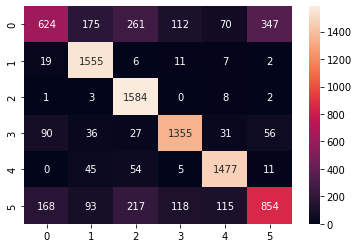

In [21]:





import seaborn as sns
cm_nb=confusion_matrix(Y_test,y_pred);
sns.heatmap(cm_nb,annot=True,fmt='d');

In [22]:
multinomial_nb=Pipeline([
  
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('model',MultinomialNB())
])

multinomial_nb.fit(X_train,Y_train);
y_pred=multinomial_nb.predict(X_test);
cr_nb=classification_report(Y_test,y_pred);
print(cr_nb);

              precision    recall  f1-score   support

           0       0.60      0.36      0.45      1589
           1       0.79      0.98      0.88      1600
           2       0.72      0.99      0.83      1598
           3       0.84      0.86      0.85      1595
           4       0.87      0.93      0.90      1592
           5       0.63      0.42      0.51      1565

    accuracy                           0.76      9539
   macro avg       0.74      0.76      0.74      9539
weighted avg       0.74      0.76      0.74      9539



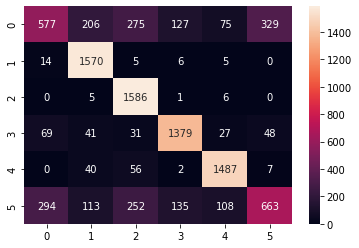

In [23]:
cm_nb=confusion_matrix(Y_test,y_pred);
sns.heatmap(cm_nb,annot=True, fmt='d');


In [24]:

multinomial_nb=Pipeline([
   
    ('vectorizer',TfidfVectorizer()),
    ('model',MultinomialNB())
])

multinomial_nb.fit(X_train,Y_train);
y_pred=multinomial_nb.predict(X_test);
cr_nb=classification_report(Y_test,y_pred);
print(cr_nb)

              precision    recall  f1-score   support

           0       0.69      0.37      0.48      1589
           1       0.79      0.97      0.87      1600
           2       0.70      0.99      0.82      1598
           3       0.83      0.85      0.84      1595
           4       0.86      0.90      0.88      1592
           5       0.67      0.50      0.58      1565

    accuracy                           0.76      9539
   macro avg       0.76      0.76      0.74      9539
weighted avg       0.76      0.76      0.75      9539



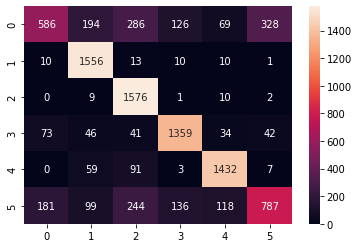

In [25]:
cm_nb=confusion_matrix(Y_test,y_pred);
sns.heatmap(cm_nb,annot=True,fmt='d');

In [26]:
random_forest=Pipeline([
   
    ('vectorizer',TfidfVectorizer()),
    ('model',RandomForestClassifier(n_estimators=27))
])

random_forest.fit(X_train,Y_train);
y_pred_random_forest=random_forest.predict(X_test);
cr_randomForest=classification_report(Y_test,y_pred_random_forest);
print(cr_randomForest);

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1589
           1       0.96      0.95      0.96      1600
           2       0.97      0.98      0.97      1598
           3       0.90      0.84      0.87      1595
           4       0.98      0.98      0.98      1592
           5       0.57      0.64      0.60      1565

    accuracy                           0.82      9539
   macro avg       0.82      0.82      0.82      9539
weighted avg       0.82      0.82      0.82      9539



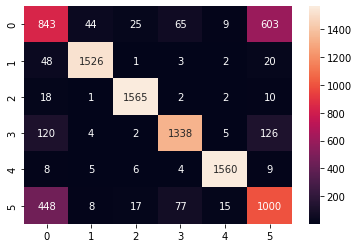

In [27]:
cm_rf=confusion_matrix(Y_test,y_pred_random_forest);
sns.heatmap(cm_rf,annot=True,fmt='d');

In [28]:

decisionTree=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'),n_estimators=27,random_state=2022))
])


decisionTree.fit(X_train,Y_train);
y_pred_decisionTree=decisionTree.predict(X_test);
cr_decisionTree=classification_report(Y_test,y_pred_decisionTree);
print(cr_decisionTree);

              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1589
           1       0.97      0.94      0.95      1600
           2       0.99      0.97      0.98      1598
           3       0.89      0.85      0.87      1595
           4       0.98      0.98      0.98      1592
           5       0.56      0.65      0.60      1565

    accuracy                           0.82      9539
   macro avg       0.83      0.82      0.82      9539
weighted avg       0.83      0.82      0.82      9539



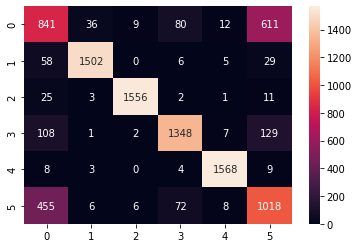

In [29]:
cm_decisionTree=confusion_matrix(Y_test,y_pred_decisionTree);
sns.heatmap(cm_decisionTree,annot=True,fmt='d');

In [30]:

svm_linear=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',SVC(kernel='linear',C=0.9))
])

svm_linear.fit(X_train,Y_train);
y_pred_svm_linear=svm_linear.predict(X_test);
cr_svm_linear=classification_report(Y_test,y_pred_svm_linear);

In [31]:
print(cr_svm_linear);

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      1589
           1       0.97      0.95      0.96      1600
           2       0.95      0.98      0.97      1598
           3       0.91      0.87      0.89      1595
           4       0.97      0.99      0.98      1592
           5       0.65      0.72      0.68      1565

    accuracy                           0.85      9539
   macro avg       0.85      0.85      0.85      9539
weighted avg       0.85      0.85      0.85      9539



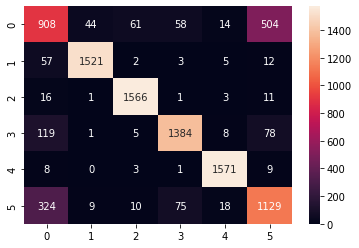

In [32]:

cm_svm_linear=confusion_matrix(Y_test,y_pred_svm_linear);
sns.heatmap(cm_svm_linear,annot=True,fmt='d');

In [33]:
svm_rbf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('model',SVC(kernel='rbf',C=0.98))

]);

svm_rbf.fit(X_train,Y_train);
y_pred_svm_rbf=svm_rbf.predict(X_test);

In [35]:
cr_svm_rbf=classification_report(Y_test,y_pred_svm_rbf);
print(cr_svm_rbf);

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      1589
           1       0.96      0.94      0.95      1600
           2       0.94      0.97      0.96      1598
           3       0.91      0.85      0.88      1595
           4       0.97      0.98      0.98      1592
           5       0.61      0.71      0.66      1565

    accuracy                           0.83      9539
   macro avg       0.83      0.83      0.83      9539
weighted avg       0.83      0.83      0.83      9539



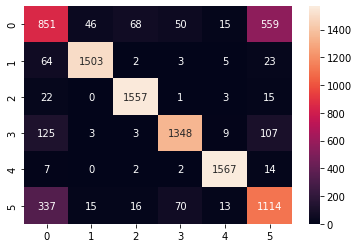

In [36]:
cm_svm_rbf=confusion_matrix(Y_test,y_pred_svm_rbf);
sns.heatmap(cm_svm_rbf,annot=True,fmt='d');

In [39]:
# Using word embeddings for text representation

def vectorize(text):
  
  return nlp(text).vector;

In [40]:
df.head(4)

,tweet_text,cyberbullying_type,preprocessed_tweets
0,"In other words #katandandre, your food was cra...",0,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,xochitlsuckkks classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,jason_gio meh p thank head concerned angry dud...


In [41]:
df['embeddings']=df['preprocessed_tweets'].apply(vectorize);

In [42]:
df.head(6)

,tweet_text,cyberbullying_type,preprocessed_tweets,embeddings
0,"In other words #katandandre, your food was cra...",0,word katandandre food crapilicious mkr,"[1.4269199, -0.44784003, -0.5476001, -0.121624..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...,"[-0.7581573, -0.70325637, -0.37171182, -0.1454..."
2,@XochitlSuckkks a classy whore? Or more red ve...,0,xochitlsuckkks classy whore red velvet cupcake,"[-2.0785968, -0.12819834, -2.0623815, 1.190051..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,jason_gio meh p thank head concerned angry dud...,"[0.24085553, 1.0879134, -0.7051667, 0.13739516..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,rudhoeenglish isis account pretend kurdish acc...,"[-0.3488288, -0.0730567, -0.9598056, 0.2925244..."
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",0,raja5aab quickieleak yes test god good bad ind...,"[0.7177841, -0.74800754, 0.033745833, -0.17426..."


In [43]:
# We will convert the embeddings into traditional np array

X_train,X_test,Y_train,Y_test=train_test_split(df.embeddings,df.cyberbullying_type,test_size=0.2,random_state=1000);
X_train=np.stack(X_train);
X_test=np.stack(X_test);


In [44]:
# Since multinomial nb cannot deal with negative values i will use min max scaler to normalize the embeddings
from sklearn.preprocessing import MinMaxScaler

multinomial_nb_embedded=Pipeline([
    ('scaler',MinMaxScaler()),
    ('model',MultinomialNB())
])

multinomial_nb_embedded.fit(X_train,Y_train);
y_pred_multinomial_nb=multinomial_nb_embedded.predict(X_test);

In [45]:
# printing the classification report 

cr_multinomial_nb=classification_report(Y_test,y_pred_multinomial_nb);
print(cr_multinomial_nb)

              precision    recall  f1-score   support

           0       0.42      0.46      0.44      1598
           1       0.58      0.79      0.66      1632
           2       0.82      0.85      0.84      1572
           3       0.71      0.61      0.66      1584
           4       0.66      0.66      0.66      1598
           5       0.41      0.25      0.31      1555

    accuracy                           0.61      9539
   macro avg       0.60      0.60      0.60      9539
weighted avg       0.60      0.61      0.60      9539



In [46]:
svm_embedded=Pipeline([
    ('model',SVC(kernel='linear',C=0.9))
])

svm_embedded.fit(X_train,Y_train);
y_pred_svm_embedded=svm_embedded.predict(X_test);

In [48]:
cr_svm_embedded=classification_report(Y_test,y_pred_svm_embedded);
print(cr_svm_embedded);

              precision    recall  f1-score   support

           0       0.52      0.48      0.50      1598
           1       0.91      0.92      0.91      1632
           2       0.94      0.93      0.93      1572
           3       0.84      0.78      0.81      1584
           4       0.92      0.92      0.92      1598
           5       0.54      0.61      0.57      1555

    accuracy                           0.78      9539
   macro avg       0.78      0.77      0.78      9539
weighted avg       0.78      0.78      0.78      9539



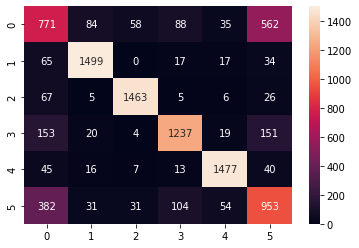

In [49]:
# Plotting the confusion matrix of svm embedded model
cm_svm_rbf=confusion_matrix(Y_test,y_pred_svm_embedded);
sns.heatmap(cm_svm_rbf,annot=True, fmt='d');

In [ ]:
# So far the results we got were not that good in the text part we will use fasttext and other deep learning methods to get a better accuracy